In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import date, timedelta
import numpy as np

# Set style for better looking charts
sns.set_style("whitegrid")

# macOS specific Thai font
plt.rcParams['font.family'] = 'Thonburi' 

# If you were on Windows, you would use:
# plt.rcParams['font.family'] = 'Tahoma'

# --- THAI FONT CONFIGURATION ---
# Matplotlib does not support Thai by default. 
# If you see squares instead of text, uncomment the lines below and set a font you have installed.
# Common Windows fonts: 'Tahoma', 'Angsana New'. MacOS: 'Thonburi'.
# Linux: 'Waree' or upload a .ttf file.

# plt.rcParams['font.family'] = 'Tahoma' 
# plt.rcParams['axes.unicode_minus'] = False

In [15]:
# UPDATE THIS PATH to match your local file location
# If the file is in the same folder as this notebook, just use the filename.
DATA_PATH = Path("../../data/cleansed/bangkok_traffy_clean.csv") 

def _parse_types(raw: str) -> list[str]:
    """Parses the type string into a list of categories."""
    cleaned = str(raw or "").strip("{} ").strip()
    if not cleaned:
        return []
    return [token.strip() for token in cleaned.split(",") if token.strip()]

def load_and_clean_data(csv_path: Path) -> pd.DataFrame:
    if not csv_path.exists():
        print(f"Error: File not found at {csv_path}")
        return pd.DataFrame()

    df = pd.read_csv(csv_path)
    
    # numeric conversion
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df = df.dropna(subset=["latitude", "longitude"])
    
    # datetime conversion
    df["timestamp_dt"] = pd.to_datetime(df["timestamp_dt"], errors="coerce")
    df["last_activity_dt"] = pd.to_datetime(df["last_activity_dt"], errors="coerce")
    
    # handle NaNs
    df["count_reopen"] = pd.to_numeric(df["count_reopen"], errors="coerce").fillna(0).astype(int)
    df["state"] = df["state"].fillna("ไม่ทราบสถานะ")
    df["district"] = df["district"].fillna("ไม่ระบุเขต")
    df["organization"] = df["organization"].fillna("ไม่ระบุหน่วยงาน")
    
    # parse types
    df["type_tokens"] = df["type"].apply(_parse_types)
    
    # Calculate resolution time (in days)
    df["resolution_days"] = (
        (df["last_activity_dt"] - df["timestamp_dt"]).dt.total_seconds() / (60 * 60 * 24)
    )
    
    print(f"Data Loaded Successfully: {len(df):,} records")
    return df

# Load the data
df = load_and_clean_data(DATA_PATH)

# Display first few rows
df.head()

Data Loaded Successfully: 620,047 records


,ticket_id,type,organization,comment,photo,photo_after,latitude,longitude,address,province,district,subdistrict,state,star,count_reopen,timestamp_dt,last_activity_dt,type_tokens,resolution_days
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,13.81865,100.53084,12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,กรุงเทพมหานคร,ไม่ระบุเขต,NaN,เสร็จสิ้น,NaN,0,2021-09-03 12:51:09+00:00,2022-06-04 15:34:14+00:00,[ความสะอาด],274.113252
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,13.67891,100.66709,189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,กรุงเทพมหานคร,ประเวศ,หนองบอน,เสร็จสิ้น,4.0,0,2021-09-19 14:56:08+00:00,2022-06-21 08:21:09+00:00,"[น้ำท่วม, ร้องเรียน]",274.725706
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด ปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,13.72060,100.52649,191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,กรุงเทพมหานคร,สาทร,ยานนาวา,เสร็จสิ้น,NaN,0,2021-09-26 05:03:52+00:00,2022-06-06 01:17:12+00:00,[สะพาน],252.842593
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,13.81853,100.53099,12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,กรุงเทพมหานคร,ไม่ระบุเขต,NaN,เสร็จสิ้น,NaN,0,2021-10-14 10:45:27+00:00,2022-09-08 08:35:43+00:00,[น้ำท่วม],328.909907
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,13.82280,100.59165,702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,กรุงเทพมหานคร,ลาดพร้าว,ลาดพร้าว,เสร็จสิ้น,5.0,0,2021-12-09 12:29:08+00:00,2022-08-12 07:18:44+00:00,"[น้ำท่วม, ถนน]",245.784444


In [16]:
# UPDATE THIS PATH to match your local file location
# If the file is in the same folder as this notebook, just use the filename.
DATA_PATH = Path("../../data/cleansed/bangkok_traffy_clean.csv") 

def _parse_types(raw: str) -> list[str]:
    """Parses the type string into a list of categories."""
    cleaned = str(raw or "").strip("{} ").strip()
    if not cleaned:
        return []
    return [token.strip() for token in cleaned.split(",") if token.strip()]

def load_and_clean_data(csv_path: Path) -> pd.DataFrame:
    if not csv_path.exists():
        print(f"Error: File not found at {csv_path}")
        return pd.DataFrame()

    df = pd.read_csv(csv_path)
    
    # numeric conversion
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df = df.dropna(subset=["latitude", "longitude"])
    
    # datetime conversion
    df["timestamp_dt"] = pd.to_datetime(df["timestamp_dt"], errors="coerce")
    df["last_activity_dt"] = pd.to_datetime(df["last_activity_dt"], errors="coerce")
    
    # handle NaNs
    df["count_reopen"] = pd.to_numeric(df["count_reopen"], errors="coerce").fillna(0).astype(int)
    df["state"] = df["state"].fillna("ไม่ทราบสถานะ")
    df["district"] = df["district"].fillna("ไม่ระบุเขต")
    df["organization"] = df["organization"].fillna("ไม่ระบุหน่วยงาน")
    
    # parse types
    df["type_tokens"] = df["type"].apply(_parse_types)
    
    # Calculate resolution time (in days)
    df["resolution_days"] = (
        (df["last_activity_dt"] - df["timestamp_dt"]).dt.total_seconds() / (60 * 60 * 24)
    )
    
    print(f"Data Loaded Successfully: {len(df):,} records")
    return df

# Load the data
df = load_and_clean_data(DATA_PATH)

# Display first few rows
df.head()

Data Loaded Successfully: 620,047 records


,ticket_id,type,organization,comment,photo,photo_after,latitude,longitude,address,province,district,subdistrict,state,star,count_reopen,timestamp_dt,last_activity_dt,type_tokens,resolution_days
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,13.81865,100.53084,12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,กรุงเทพมหานคร,ไม่ระบุเขต,NaN,เสร็จสิ้น,NaN,0,2021-09-03 12:51:09+00:00,2022-06-04 15:34:14+00:00,[ความสะอาด],274.113252
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,13.67891,100.66709,189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,กรุงเทพมหานคร,ประเวศ,หนองบอน,เสร็จสิ้น,4.0,0,2021-09-19 14:56:08+00:00,2022-06-21 08:21:09+00:00,"[น้ำท่วม, ร้องเรียน]",274.725706
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด ปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,13.72060,100.52649,191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,กรุงเทพมหานคร,สาทร,ยานนาวา,เสร็จสิ้น,NaN,0,2021-09-26 05:03:52+00:00,2022-06-06 01:17:12+00:00,[สะพาน],252.842593
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,13.81853,100.53099,12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,กรุงเทพมหานคร,ไม่ระบุเขต,NaN,เสร็จสิ้น,NaN,0,2021-10-14 10:45:27+00:00,2022-09-08 08:35:43+00:00,[น้ำท่วม],328.909907
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,13.82280,100.59165,702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,กรุงเทพมหานคร,ลาดพร้าว,ลาดพร้าว,เสร็จสิ้น,5.0,0,2021-12-09 12:29:08+00:00,2022-08-12 07:18:44+00:00,"[น้ำท่วม, ถนน]",245.784444


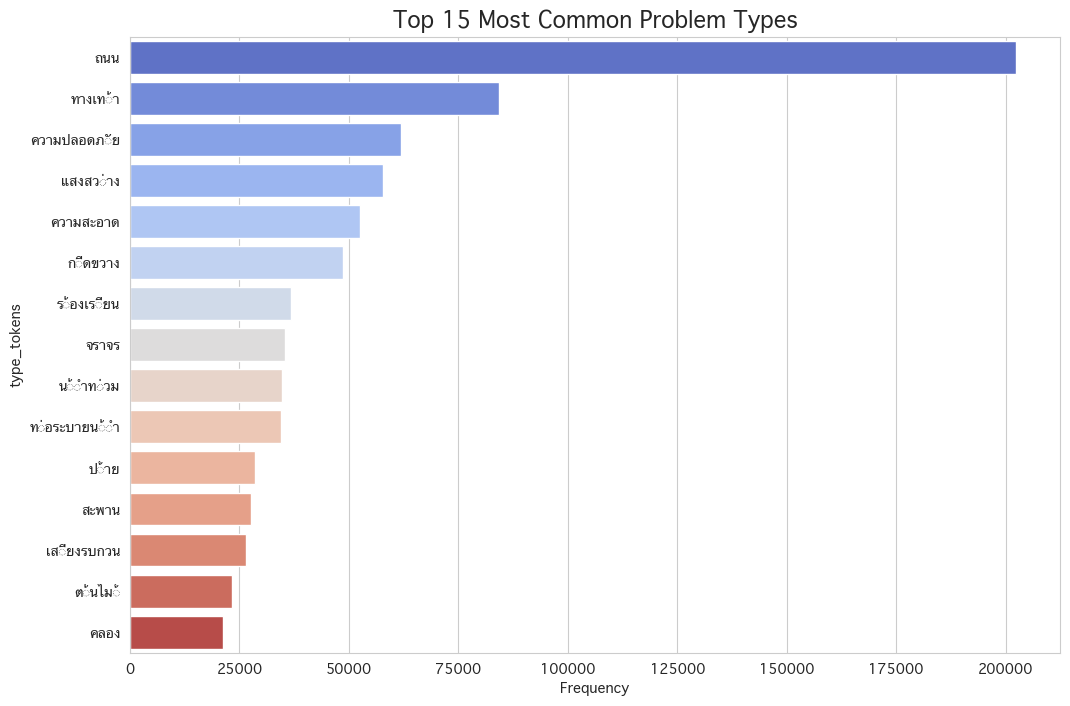

In [17]:
# Explode the list of types into individual rows
type_exploded = df.explode("type_tokens")
type_counts = type_exploded['type_tokens'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=type_counts.values, 
    y=type_counts.index, 
    hue=type_counts.index,  # Assign y to hue
    legend=False,           # Hide the redundant legend
    palette="coolwarm"
)

plt.title("Top 15 Most Common Problem Types", fontsize=16)
plt.xlabel("Frequency")
plt.show()

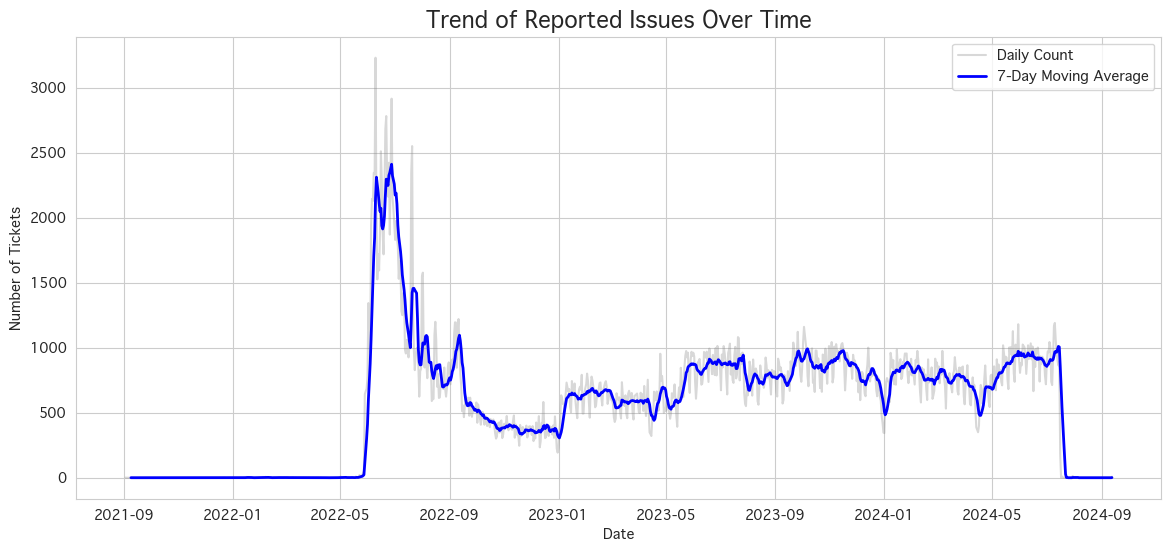

In [18]:
# Resample by day
daily_trends = df.set_index('timestamp_dt').resample('D').size()

# Calculate a 7-day rolling average to smooth the line
rolling_avg = daily_trends.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_trends.index, daily_trends.values, label='Daily Count', alpha=0.3, color='gray')
plt.plot(rolling_avg.index, rolling_avg.values, label='7-Day Moving Average', color='blue', linewidth=2)

plt.title("Trend of Reported Issues Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Tickets")
plt.legend()
plt.show()

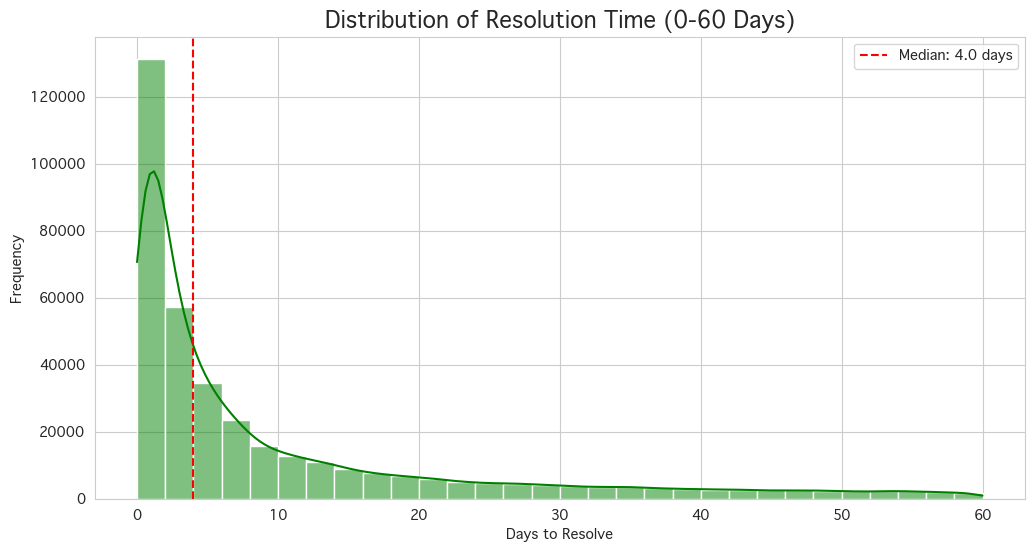

In [19]:
# Filter only finished tasks with valid positive duration
finished_tasks = df[
    (df['state'] == 'เสร็จสิ้น') & 
    (df['resolution_days'] >= 0) & 
    (df['resolution_days'] < 60) # Filter outliers > 60 days for better visualization
]

plt.figure(figsize=(12, 6))
sns.histplot(finished_tasks['resolution_days'], bins=30, kde=True, color='green')

plt.title("Distribution of Resolution Time (0-60 Days)", fontsize=16)
plt.xlabel("Days to Resolve")
plt.ylabel("Frequency")

median_days = finished_tasks['resolution_days'].median()
plt.axvline(median_days, color='red', linestyle='--', label=f'Median: {median_days:.1f} days')
plt.legend()
plt.show()

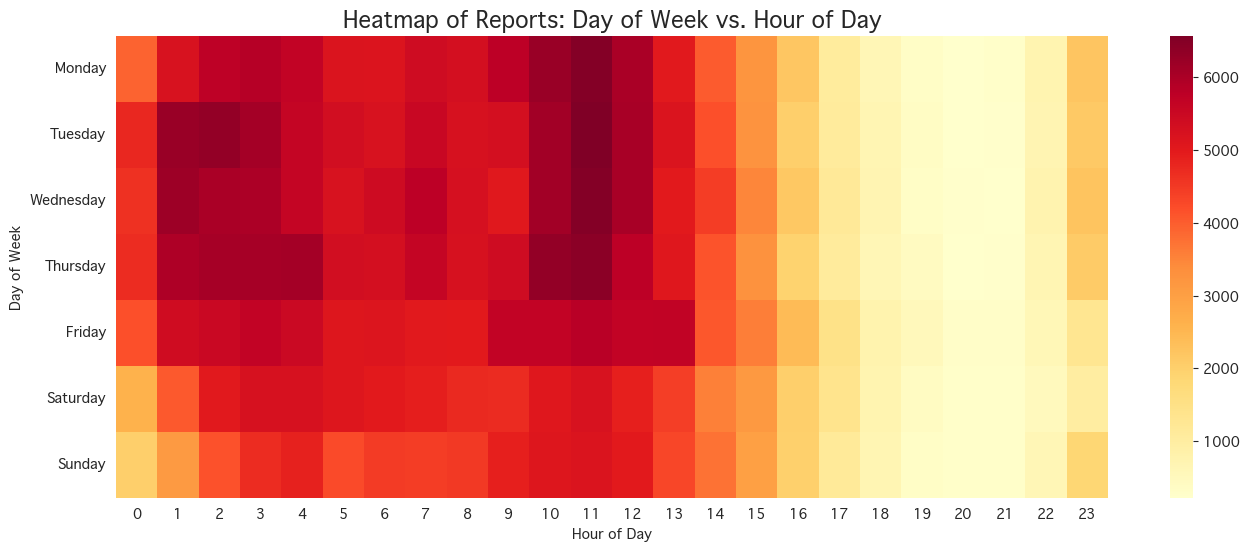

In [20]:
# Extract Day of Week and Hour
df['day_of_week'] = df['timestamp_dt'].dt.day_name()
df['hour'] = df['timestamp_dt'].dt.hour

# Sort order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create pivot table
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='ticket_id', aggfunc='count').reindex(days_order)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, fmt="d")
plt.title("Heatmap of Reports: Day of Week vs. Hour of Day", fontsize=16)
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()